### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import matplotlib
import seaborn as sns
from skimage.measure import find_contours
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import xtrack as xt
import json
import pickle

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### 30 cm


In [2]:
# Define study
STUDY_NAME = "PU_function_all_optics_neg_oct"
COLLIDER = "collider_00"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy                                        
lhcb1 collider_00        6.000000e+10            110.0          62.315 60.32                             4.500   
                                                 115.0          62.315 60.32                             4.688   
                                                 120.0          62.315 60.32                             4.938   
                                                 125.0          62.315 60.32                             5.031   
                                                 130.0          62.315 60.32                             5.281   
...                                                                                                        ...   
      collider_02        1.400000e+11            140.0          62.315 60.32                             4.500   
                                                 145.0          62.315 60.32                             4.500   
                                                 150.0          62.315 60.32                             4.500   
                                                 155.0          62.315 60.32                             4.500   
                                                 160.0          62.315 60.32                             4.500   

                                                                                  qx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy              
lhcb1 collider_00        6.000000e+10            110.0          62.315 60.32  62.315   
                                                 115.0          62.315 60.32  62.315   
                                                 120.0          62.315 60.32  62.315   
                                                 125.0          62.315 60.32  62.315   
                                                 130.0          62.315 60.32  62.315   
...                                                                              ...   
      collider_02        1.400000e+11            140.0          62.315 60.32  62.315   
                                                 145.0          62.315 60.32  62.315   
                                                 150.0          62.315 60.32  62.315   
                                                 155.0          62.315 60.32  62.315   
                                                 160.0          62.315 60.32  62.315   

                                                                                 qy  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy             
lhcb1 collider_00        6.000000e+10            110.0          62.315 60.32  60.32   
                                                 115.0          62.315 60.32  60.32   
                                                 120.0          62.315 60.32  60.32   
                                                 125.0          62.315 60.32  60.32   
                                                 130.0          62.315 60.32  60.32   
...                                                                             ...   
      collider_02        1.400000e+11            140.0          62.315 60.32  60.32   
                                                 145.0          62.315 60.32  60.32   
                                                 150.0          62.315 60.32  60.32   
                                                 155.0          62.315 60.32  60.32   
                                                 160.0          62.315 60.32  60.32   

                                                                               dqx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy            
lhcb1 collider_00        6.000000e+10            110.0          62.315 60.32  15.0   
                                                 115.0      

In [3]:
# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
df_to_plot


crossing_angle,110.0,115.0,120.0,125.0,130.0,135.0,140.0,145.0,150.0,155.0,160.0
num_particles_per_bunch,,,,,,,,,,,
0.600,4.500,4.688,4.938,5.031,5.281,5.438,5.312,5.406,5.812,5.969,6.156
0.625,4.500,4.594,4.781,4.938,4.938,5.406,5.312,5.375,5.438,5.469,5.812
0.650,4.500,4.531,4.969,4.562,4.938,5.062,5.438,5.531,5.625,5.875,5.750
0.675,4.500,4.500,4.500,4.688,4.719,5.062,5.000,5.250,5.281,5.531,5.906
0.700,4.500,4.500,4.562,4.562,4.844,5.156,5.000,5.125,5.219,5.375,5.938
0.725,4.531,4.500,4.500,4.656,4.844,4.812,5.031,5.125,5.188,5.438,5.812
0.750,4.500,4.500,4.531,4.562,4.656,4.875,4.938,5.031,5.188,5.438,5.594
0.775,4.500,4.500,4.500,4.500,4.500,4.656,4.875,5.031,5.406,5.375,5.625
0.800,4.500,4.500,4.500,4.531,4.500,4.875,4.656,4.812,5.312,5.281,5.562


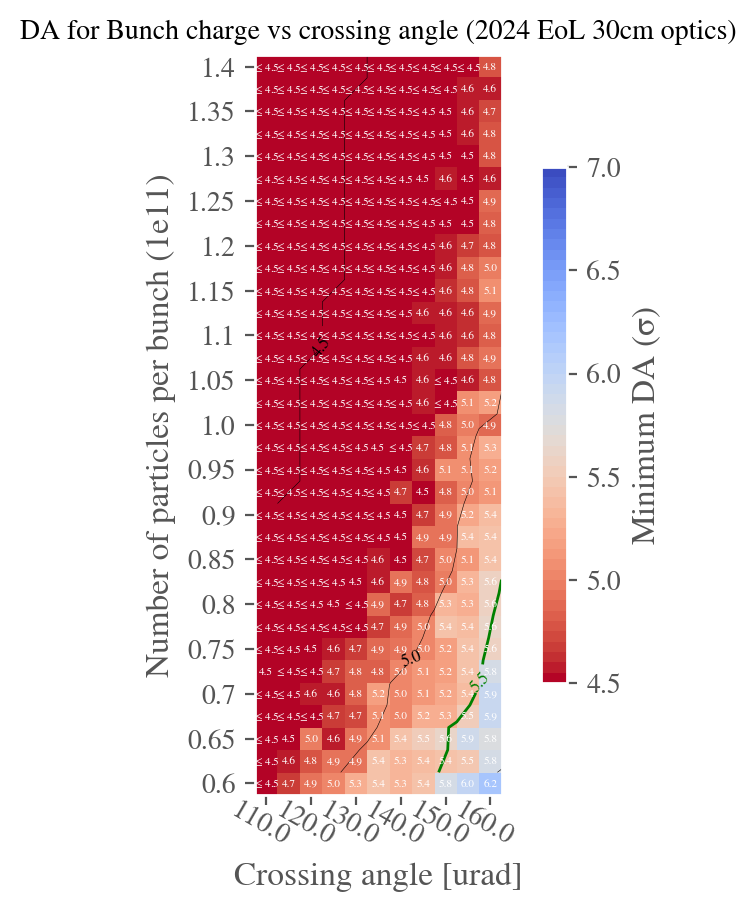

In [4]:
# Load configuration files
qx = 62.313
qy = 60.318
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 30cm optics)"
)


In [5]:
df_30_cm = df_to_plot.copy()

### 26cm

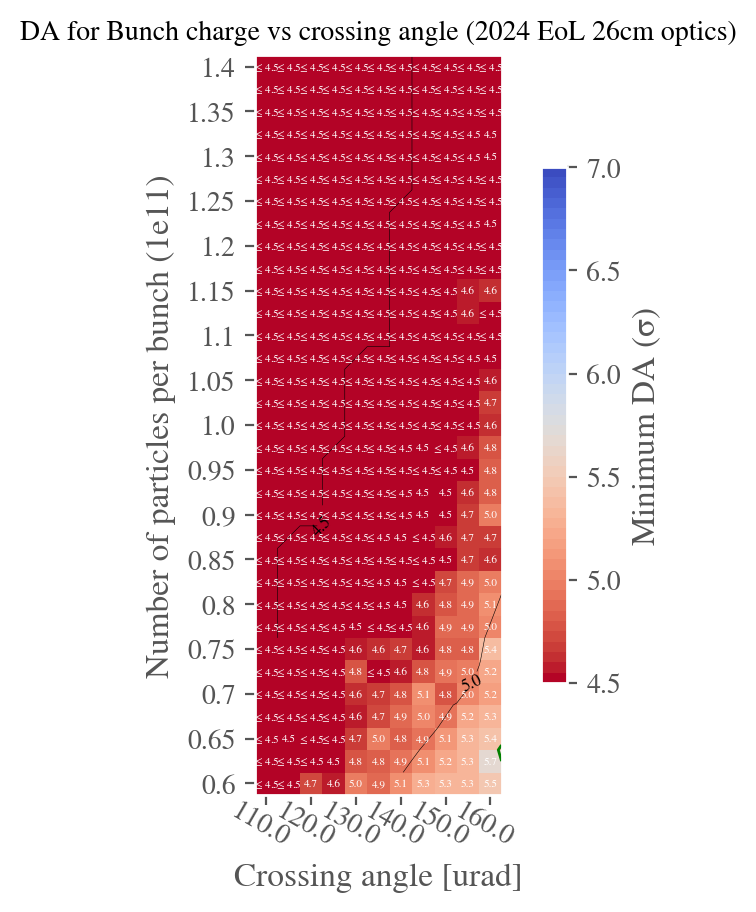

In [6]:
# Define study
STUDY_NAME = "PU_function_all_optics_neg_oct"
COLLIDER = "collider_01"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 26cm optics)"
)

In [7]:
df_26_cm = df_to_plot.copy()

### 22 cm

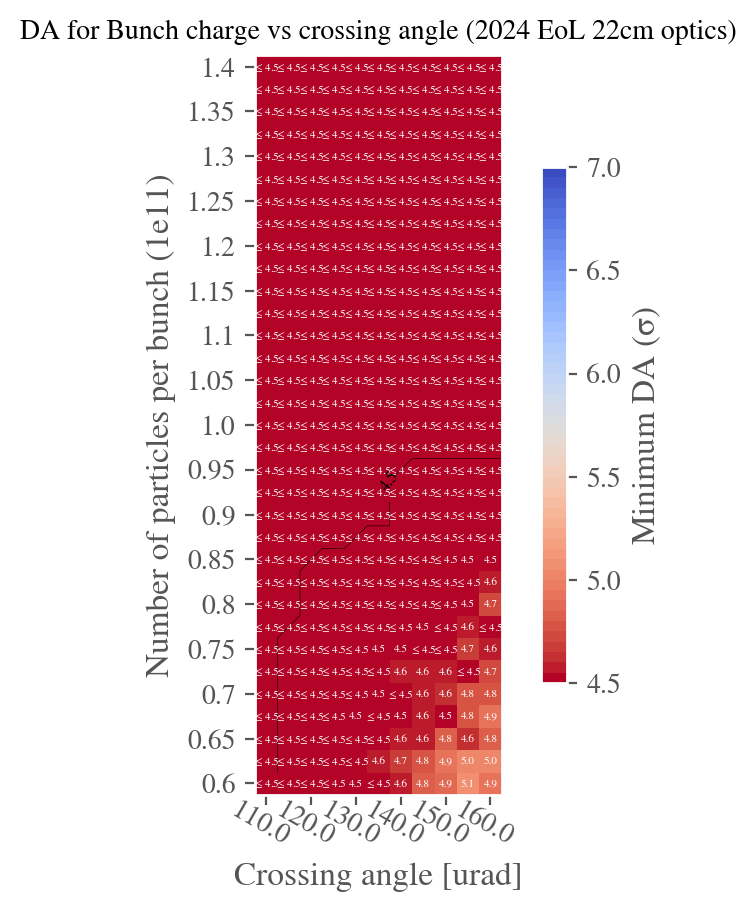

In [8]:
# Define study
STUDY_NAME = "PU_function_all_optics_neg_oct"
COLLIDER = "collider_02"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 22cm optics)"
)

In [9]:
df_22_cm = df_to_plot.copy()

## Interpolate the data for each optics

In [10]:
from scipy import interpolate
import numpy as np

In [11]:
x = df_30_cm.index
y = df_30_cm.columns
array = np.ma.masked_invalid(df_30_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_30cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)
interpolate_df_30cm.index = df_30_cm.index
interpolate_df_30cm.columns = df_30_cm.columns

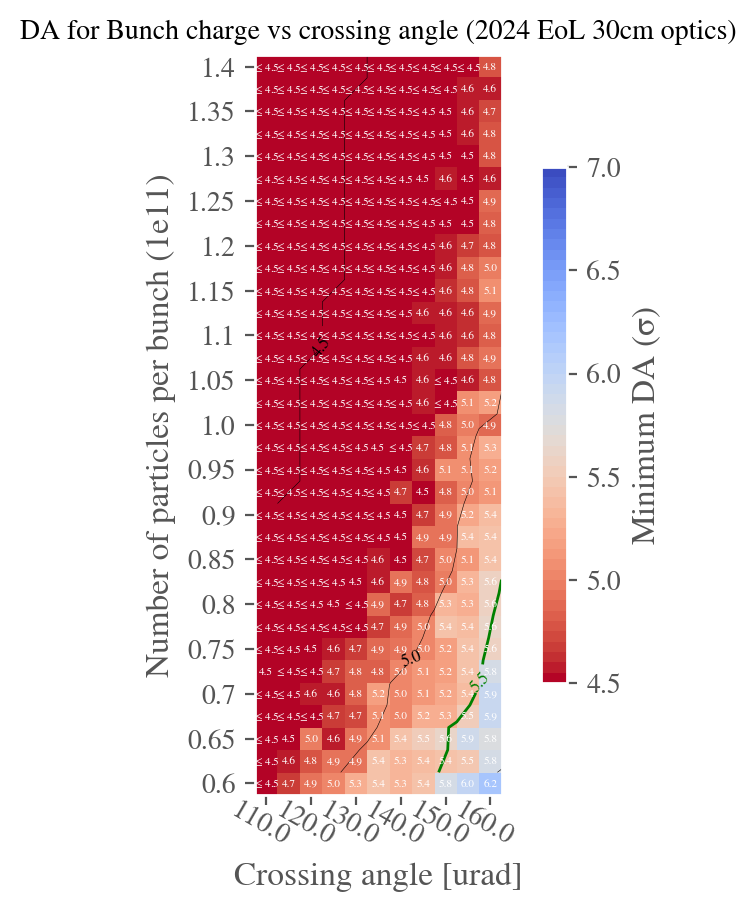

In [12]:
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_30cm,
    '30cm_interpolated'+ '_' + str(qx) + '_' + str(qy)+ '_neg_oct',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 30cm optics)"
)

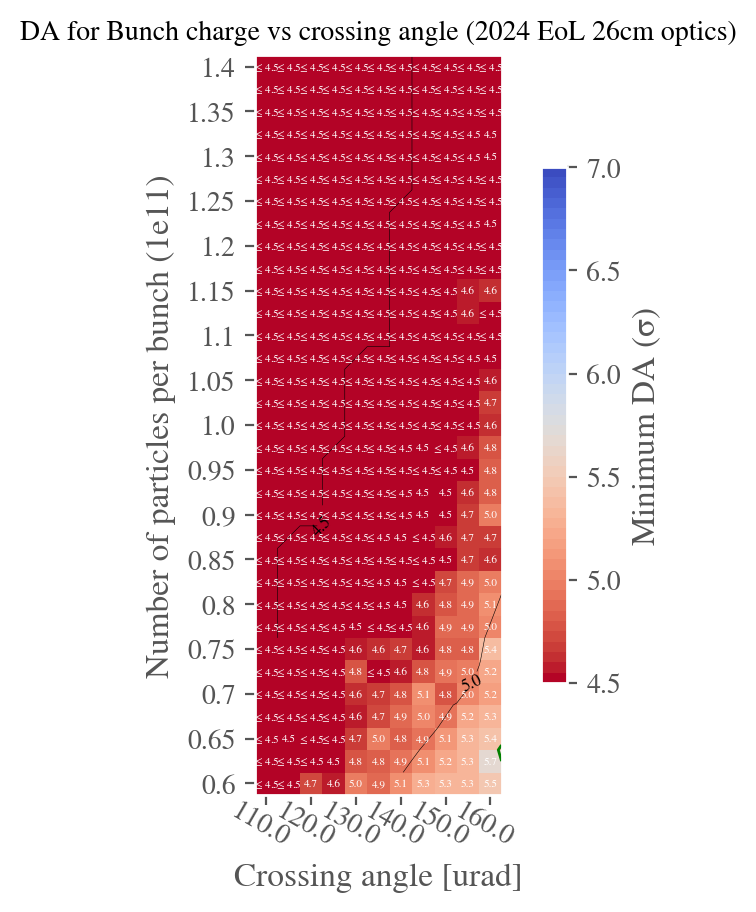

In [13]:
x = df_26_cm.index
y = df_26_cm.columns
array = np.ma.masked_invalid(df_26_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_26cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)
interpolate_df_26cm.index = df_26_cm.index
interpolate_df_26cm.columns = df_26_cm.columns

conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_26cm,
    '26cm_interpolated'+ '_' + str(qx) + '_' + str(qy)+ '_neg_oct',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 26cm optics)"
)

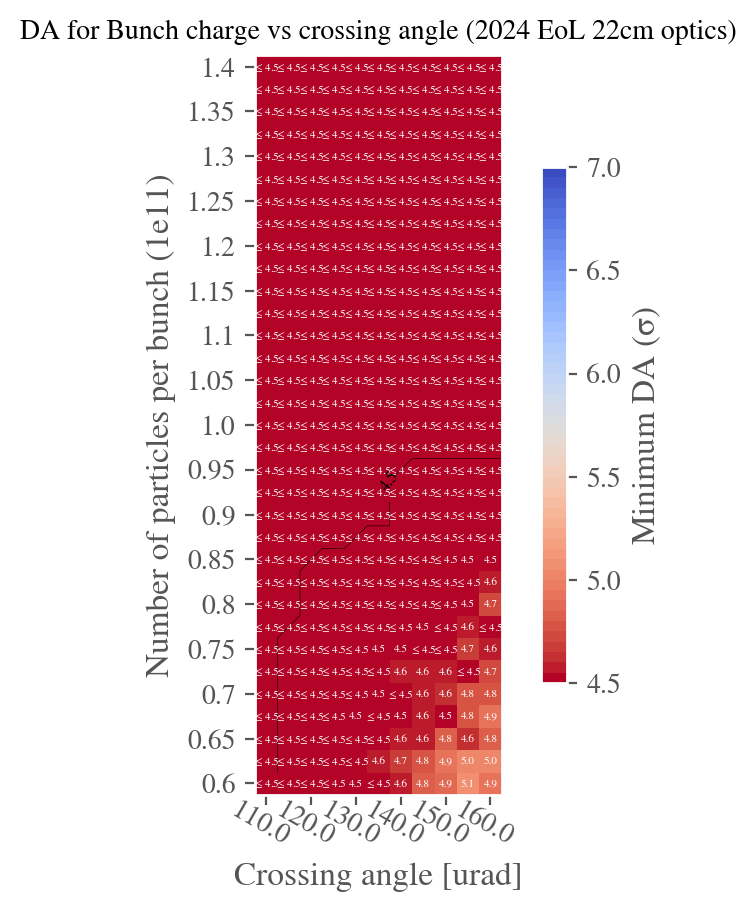

In [14]:
x = df_22_cm.index
y = df_22_cm.columns
array = np.ma.masked_invalid(df_22_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_22cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)
interpolate_df_22cm.index = df_22_cm.index
interpolate_df_22cm.columns = df_22_cm.columns

conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_22cm,
    '22cm_interpolated'+ '_' + str(qx) + '_' + str(qy) + '_neg_oct',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 22cm optics)"
)

### Find contours at 5.5 sigma

In [15]:
contours_30cm = find_contours(interpolate_df_30cm.values, level=5.5)

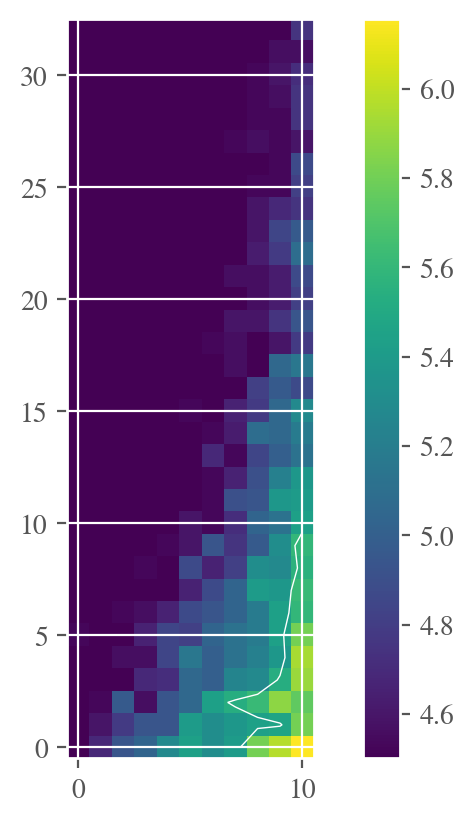

In [16]:
fig, ax = plt.subplots(1, 1)
img = ax.imshow(interpolate_df_30cm.values, origin='lower')
plt.colorbar(img)
for i in range(len(contours_30cm)):
    p = plt.Polygon(contours_30cm[i][:,[1,0]], fill=False, color='w', closed = False)
    ax.add_artist(p)
    
plt.show()

In [17]:
# Smooth a lot to have a smooth contour
smooth_30cm = gaussian_filter(interpolate_df_30cm.values, sigma=1)
contours_30cm = find_contours(smooth_30cm, level=5.5)


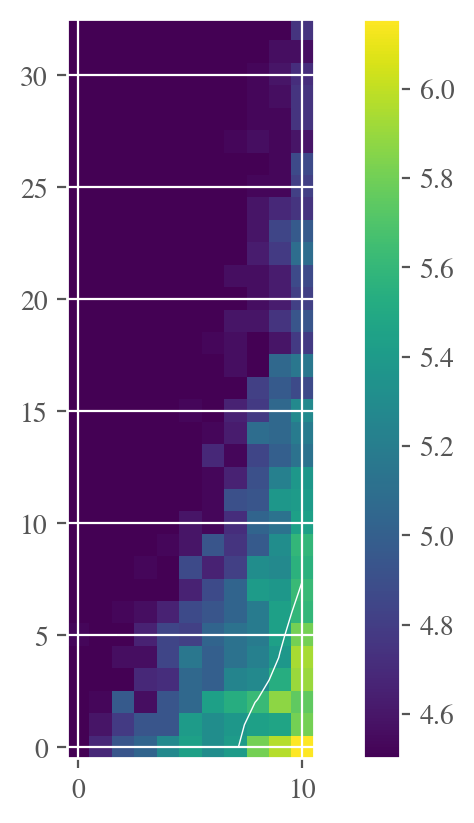

In [18]:
fig, ax = plt.subplots(1, 1)
img = ax.imshow(interpolate_df_30cm.values, origin='lower')
plt.colorbar(img)
for i in range(len(contours_30cm)):
    p = plt.Polygon(contours_30cm[i][:,[1,0]], fill=False, color='w', closed = False)
    ax.add_artist(p)
plt.show()

In [19]:
# Also get the same curve for 26cm and 22cm
smooth_26cm = gaussian_filter(interpolate_df_26cm.values, sigma=1)
contours_26cm = find_contours(smooth_26cm, level=5.5)

smooth_22cm = gaussian_filter(interpolate_df_22cm.values, sigma=1)
contours_22cm = find_contours(smooth_22cm, level=5.5)



In [20]:
# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

# %config InlineBackend.figure_format='pdf'

In [21]:
# Extract curve
contour_for_extraction_30cm = contours_30cm[0][contours_30cm[0][:, 1].argsort()]
contour_for_extraction_26cm = contours_26cm[0][contours_26cm[0][:, 1].argsort()]
contour_for_extraction_22cm = contours_22cm[0][contours_22cm[0][:, 1].argsort()]

x_30cm = contour_for_extraction_30cm[:,1]
y_30cm = contour_for_extraction_30cm[:,0]

x_26cm = contour_for_extraction_26cm[:,1]
y_26cm = contour_for_extraction_26cm[:,0]

x_22cm = contour_for_extraction_22cm[:,1]
y_22cm = contour_for_extraction_22cm[:,0]

# Convert back to initial units
f1 = interpolate.interp1d(range(len(df_30_cm.index)), df_30_cm.index)
f2 = interpolate.interp1d(range(len(df_30_cm.columns)), df_30_cm.columns)

x_real_30cm = f2(x_30cm)
y_real_30cm = f1(y_30cm)

x_real_26cm = f2(x_26cm)
y_real_26cm = f1(y_26cm)

x_real_22cm = f2(x_22cm)
y_real_22cm = f1(y_22cm)

# Compute rescaled 26cm and 22cm
f3 = interpolate.interp1d(x_real_30cm, y_real_30cm, bounds_error = False, fill_value = 'extrapolate')
rescaled_y_22cm = f3(x_real_30cm * np.sqrt(22/30))
rescaled_y_26cm = f3(x_real_30cm * np.sqrt(26/30))

plt.plot(x_real_30cm,y_real_30cm, color = 'C0', label = '30cm')

plt.plot(x_real_26cm,y_real_26cm, color = 'C2', label = '26cm')
plt.plot(x_real_30cm, rescaled_y_26cm, '--', color = 'C2', label = '26cm from scaling law')

plt.plot(x_real_22cm,y_real_22cm, color = 'C1', label = '22cm')
plt.plot(x_real_30cm, rescaled_y_22cm, '--', color = 'C1', label = '22cm from scaling law')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Bunch charge [1e11]")
plt.title("5.5 iso-DA curves")
plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
# plt.savefig('plots/iso_DA_5dot5.pdf')
plt.show()

IndexError: list index out of range

### Find contours at 5 sigma

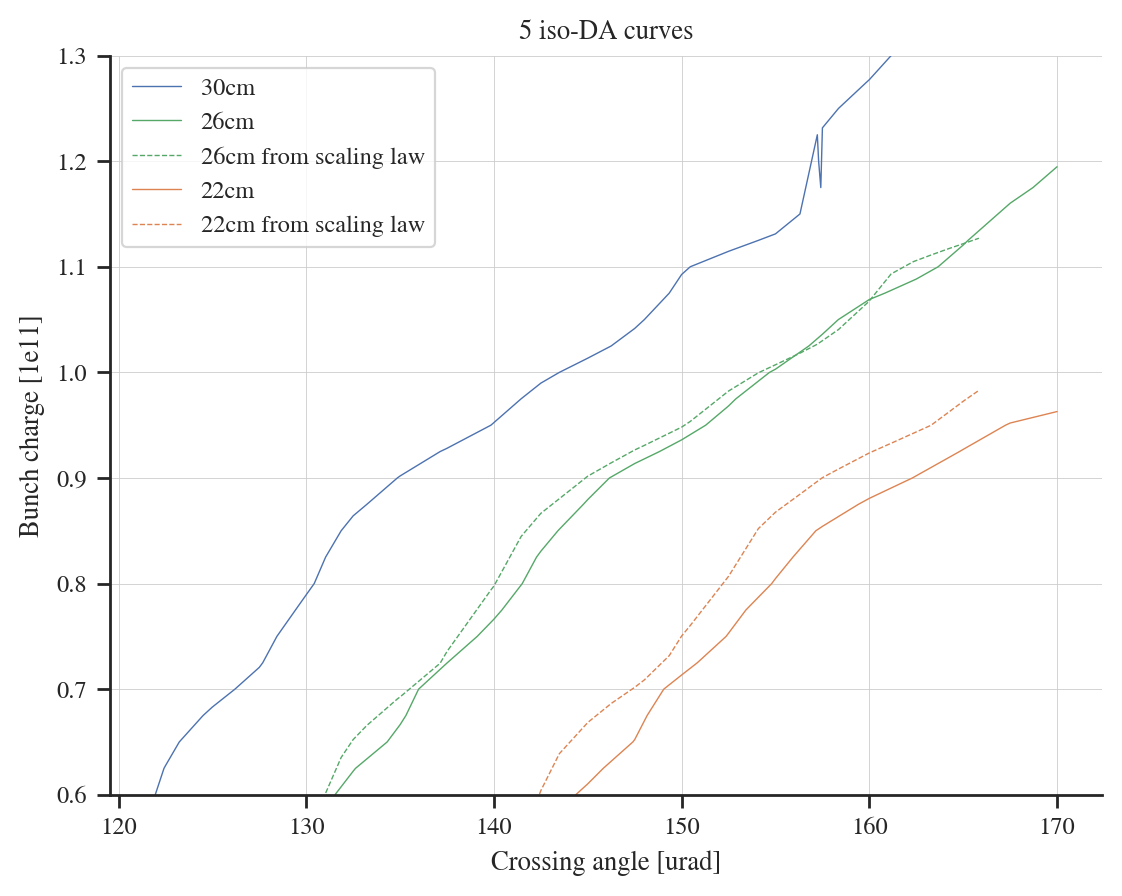

In [ ]:
# Smooth to have a smooth contour
contours_30cm_5sig = find_contours(smooth_30cm, level=5)
contours_26cm_5sig = find_contours(smooth_26cm, level=5)
contours_22cm_5sig = find_contours(smooth_22cm, level=5)

# Extract curve
contour_for_extraction_30cm_5sig = contours_30cm_5sig[0][contours_30cm_5sig[0][:, 1].argsort()]
contour_for_extraction_26cm_5sig = contours_26cm_5sig[0][contours_26cm_5sig[0][:, 1].argsort()]
contour_for_extraction_22cm_5sig = contours_22cm_5sig[0][contours_22cm_5sig[0][:, 1].argsort()]

x_30cm_5sig = contour_for_extraction_30cm_5sig[:,1]
y_30cm_5sig = contour_for_extraction_30cm_5sig[:,0]

x_26cm_5sig = contour_for_extraction_26cm_5sig[:,1]
y_26cm_5sig = contour_for_extraction_26cm_5sig[:,0]

x_22cm_5sig = contour_for_extraction_22cm_5sig[:,1]
y_22cm_5sig = contour_for_extraction_22cm_5sig[:,0]

# Convert back to initial units
f1 = interpolate.interp1d(range(len(df_30_cm.index)), df_30_cm.index)
f2 = interpolate.interp1d(range(len(df_30_cm.columns)), df_30_cm.columns)

x_real_30cm_5sig = f2(x_30cm_5sig)
y_real_30cm_5sig = f1(y_30cm_5sig)

x_real_26cm_5sig = f2(x_26cm_5sig)
y_real_26cm_5sig= f1(y_26cm_5sig)

x_real_22cm_5sig = f2(x_22cm_5sig)
y_real_22cm_5sig = f1(y_22cm_5sig)

# Compute rescaled 26cm and 22cm
f3 = interpolate.interp1d(x_real_30cm_5sig, y_real_30cm_5sig, bounds_error = False, fill_value = 'extrapolate')
rescaled_y_22cm_5sig = f3(x_real_30cm_5sig * np.sqrt(22/30))
rescaled_y_26cm_5sig = f3(x_real_30cm_5sig * np.sqrt(26/30))

plt.plot(x_real_30cm_5sig,y_real_30cm_5sig, color = 'C0', label = '30cm')

plt.plot(x_real_26cm_5sig,y_real_26cm_5sig, color = 'C2', label = '26cm')
plt.plot(x_real_30cm_5sig, rescaled_y_26cm_5sig, '--', color = 'C2', label = '26cm from scaling law')

plt.plot(x_real_22cm_5sig,y_real_22cm_5sig, color = 'C1', label = '22cm')
plt.plot(x_real_30cm_5sig, rescaled_y_22cm_5sig, '--', color = 'C1', label = '22cm from scaling law')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Bunch charge [1e11]")
plt.title("5 iso-DA curves")
plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
# plt.savefig('plots/iso_DA_5.pdf')
plt.show()

### Convert to PU function

In [ ]:
# Extracted from master jobs
def compute_collision_from_scheme(config_bb):
    # Get the filling scheme path (in json or csv format)
    filling_scheme_path = config_bb["mask_with_filling_pattern"]["pattern_fname"]

    # Load the filling scheme
    if filling_scheme_path.endswith(".json"):
        with open(filling_scheme_path, "r") as fid:
            filling_scheme = json.load(fid)
    else:
        raise ValueError(
            f"Unknown filling scheme file format: {filling_scheme_path}. It you provided a csv"
            " file, it should have been automatically convert when running the script"
            " 001_make_folders.py. Something went wrong."
        )

    # Extract booleans beam arrays
    array_b1 = np.array(filling_scheme["beam1"])
    array_b2 = np.array(filling_scheme["beam2"])

    # Assert that the arrays have the required length, and do the convolution
    assert len(array_b1) == len(array_b2) == 3564
    n_collisions_ip1_and_5 = array_b1 @ array_b2
    n_collisions_ip2 = np.roll(array_b1, 891) @ array_b2
    n_collisions_ip8 = np.roll(array_b1, 2670) @ array_b2

    return n_collisions_ip1_and_5, n_collisions_ip2, n_collisions_ip8


def compute_lumi(bunch_charge, twiss_b1, twiss_b2, crab, nemitt_x, nemitt_y, sigma_z, num_colliding_bunches):
    luminosity = xt.lumi.luminosity_from_twiss(
        n_colliding_bunches=num_colliding_bunches,
        num_particles_per_bunch=bunch_charge,
        ip_name="ip1",
        nemitt_x=nemitt_x,
        nemitt_y=nemitt_y,
        sigma_z=sigma_z,
        twiss_b1=twiss_b1,
        twiss_b2=twiss_b2,
        crab=crab,
    )
    return luminosity

def compute_PU(luminosity, num_colliding_bunches, T_rev0, cross_section=81e-27):
    return luminosity / num_colliding_bunches * cross_section * T_rev0

def compute_PU_from_lumi(collider, config_bb):
    twiss_b1 = collider.lhcb1.twiss()
    twiss_b2 = collider.lhcb2.twiss()
    crab = False
    nemitt_x = config_bb["nemitt_x"]
    nemitt_y = config_bb["nemitt_y"]
    sigma_z = config_bb["sigma_z"]
    n_collisions_ip1_and_5, n_collisions_ip2, n_collisions_ip8 = compute_collision_from_scheme(config_bb)
    bunch_charge = config_bb["num_particles_per_bunch"]
    T_rev0 = twiss_b1["T_rev0"]
    luminosity = compute_lumi(bunch_charge, twiss_b1, twiss_b2, crab, nemitt_x, nemitt_y, sigma_z, n_collisions_ip1_and_5)
    return compute_PU(luminosity, n_collisions_ip1_and_5, T_rev0)

# Extracted from master job
def configure_beam_beam(collider, config_bb):
    collider.configure_beambeam_interactions(
        num_particles=float(config_bb["num_particles_per_bunch"]),
        nemitt_x=config_bb["nemitt_x"],
        nemitt_y=config_bb["nemitt_y"],
    )

    # Configure filling scheme mask and bunch numbers
    if "mask_with_filling_pattern" in config_bb:
        # Initialize filling pattern with empty values
        filling_pattern_cw = None
        filling_pattern_acw = None

        # Initialize bunch numbers with empty values
        i_bunch_cw = None
        i_bunch_acw = None

        if "pattern_fname" in config_bb["mask_with_filling_pattern"]:
            # Fill values if possible
            if config_bb["mask_with_filling_pattern"]["pattern_fname"] is not None:
                fname = config_bb["mask_with_filling_pattern"]["pattern_fname"]
                with open(fname, "r") as fid:
                    filling = json.load(fid)
                filling_pattern_cw = filling["beam1"]
                filling_pattern_acw = filling["beam2"]

                # Only track bunch number if a filling pattern has been provided
                if "i_bunch_b1" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_cw = config_bb["mask_with_filling_pattern"]["i_bunch_b1"]
                if "i_bunch_b2" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_acw = config_bb["mask_with_filling_pattern"]["i_bunch_b2"]

                # Note that a bunch number must be provided if a filling pattern is provided
                # Apply filling pattern
                collider.apply_filling_pattern(
                    filling_pattern_cw=filling_pattern_cw,
                    filling_pattern_acw=filling_pattern_acw,
                    i_bunch_cw=i_bunch_cw,
                    i_bunch_acw=i_bunch_acw,
                )
    return collider

In [ ]:
if False:
    # Load collider and config for 30cm optics
    collider_30cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_30cm/base_collider/xtrack_0000/collider.json"
    config_collider_30cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_30cm/base_collider/xtrack_0000/config.yaml"
    collider_30cm = xt.Multiline.from_json(collider_30cm_path)
    config_30cm = analysis_functions.load_config(config_collider_30cm_path)["config_collider"]["config_beambeam"]
    collider_30cm.build_trackers()

    # Same with 26cm and 22cm optics
    collider_26cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_26cm/base_collider/xtrack_0000/collider.json"
    config_collider_26cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_26cm/base_collider/xtrack_0000/config.yaml"
    collider_26cm = xt.Multiline.from_json(collider_26cm_path)
    config_26cm = analysis_functions.load_config(config_collider_26cm_path)["config_collider"]["config_beambeam"]
    collider_26cm.build_trackers()

    collider_22cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_22cm/base_collider/xtrack_0000/collider.json"
    config_collider_22cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_22cm/base_collider/xtrack_0000/config.yaml"
    collider_22cm = xt.Multiline.from_json(collider_22cm_path)
    config_22cm = analysis_functions.load_config(config_collider_22cm_path)["config_collider"]["config_beambeam"]
    collider_22cm.build_trackers()

In [ ]:
# Configure the beam-beam only once for each collider (approximation)
if False:
    collider_30cm = configure_beam_beam(collider_30cm, config_30cm)
    collider_26cm = configure_beam_beam(collider_26cm, config_26cm)
    collider_22cm = configure_beam_beam(collider_22cm, config_22cm)

In [ ]:
if False:
    # Set bunch charge and crossing angle for all points along the curve, recompute the beam-beam and compute the corresponding PU

    # Start with 5.5 sigmas
    ll_PU = []
    for collider, array_xing, array_nb, config_bb in zip(
        [collider_30cm, collider_26cm, collider_22cm],
        [x_real_30cm, x_real_26cm, x_real_22cm],
        [y_real_30cm, y_real_26cm, y_real_22cm],
        [config_30cm, config_26cm, config_22cm],
    ):
        l_PU = []
        for xing, nb in zip(array_xing, array_nb):
            collider.vars["on_x1"] = float(xing)
            collider.vars["on_x5"] = float(xing)
            config_bb["num_particles_per_bunch"] = float(nb*1e11)
            # collider = configure_beam_beam(collider, config_bb)
            PU = compute_PU_from_lumi(collider, config_bb)
            l_PU.append(PU)
        ll_PU.append(l_PU)

    # Save ll_PU to pickle
    with open("PU_5dot5_neg_oct.pkl", "wb") as f:
        pickle.dump(ll_PU, f)

    # Same with 5 sigmas
    ll_PU_5sig = []
    for collider, array_xing, array_nb, config_bb in zip(
        [collider_30cm, collider_26cm, collider_22cm],
        [x_real_30cm_5sig, x_real_26cm_5sig, x_real_22cm_5sig],
        [y_real_30cm_5sig, y_real_26cm_5sig, y_real_22cm_5sig],
        [config_30cm, config_26cm, config_22cm],
    ):
        l_PU = []
        for xing, nb in zip(array_xing, array_nb):
            collider.vars["on_x1"] = float(xing)
            collider.vars["on_x5"] = float(xing)
            config_bb["num_particles_per_bunch"] = float(nb*1e11)
            # collider = configure_beam_beam(collider, config_bb)
            PU = compute_PU_from_lumi(collider, config_bb)
            l_PU.append(PU)
        ll_PU_5sig.append(l_PU)

    # Save ll_PU to pickle
    with open("PU_5_neg_oct.pkl", "wb") as f:
        pickle.dump(ll_PU_5sig, f)

In [ ]:
with open("PU_5dot5_neg_oct.pkl", "rb") as f:
    ll_PU = pickle.load(f)
    
with open("PU_5_neg_oct.pkl", "rb") as f:
    ll_PU_5sig = pickle.load(f)

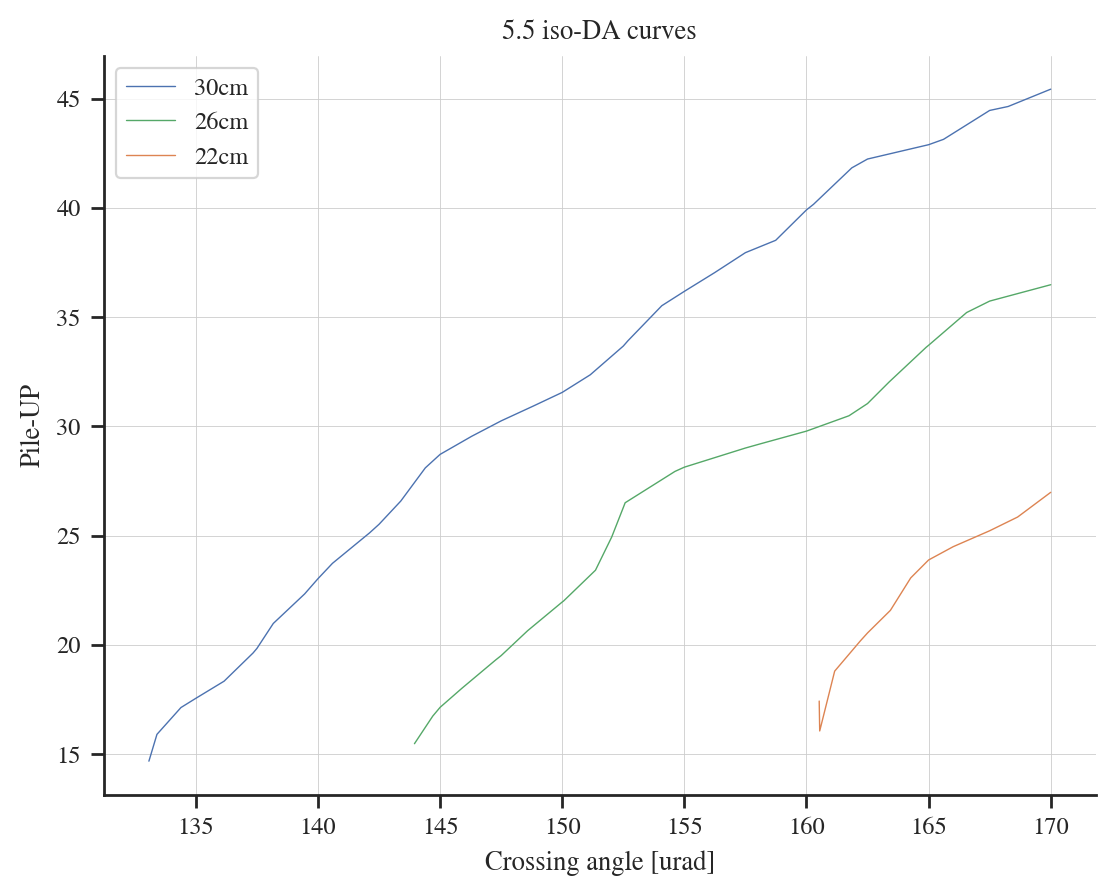

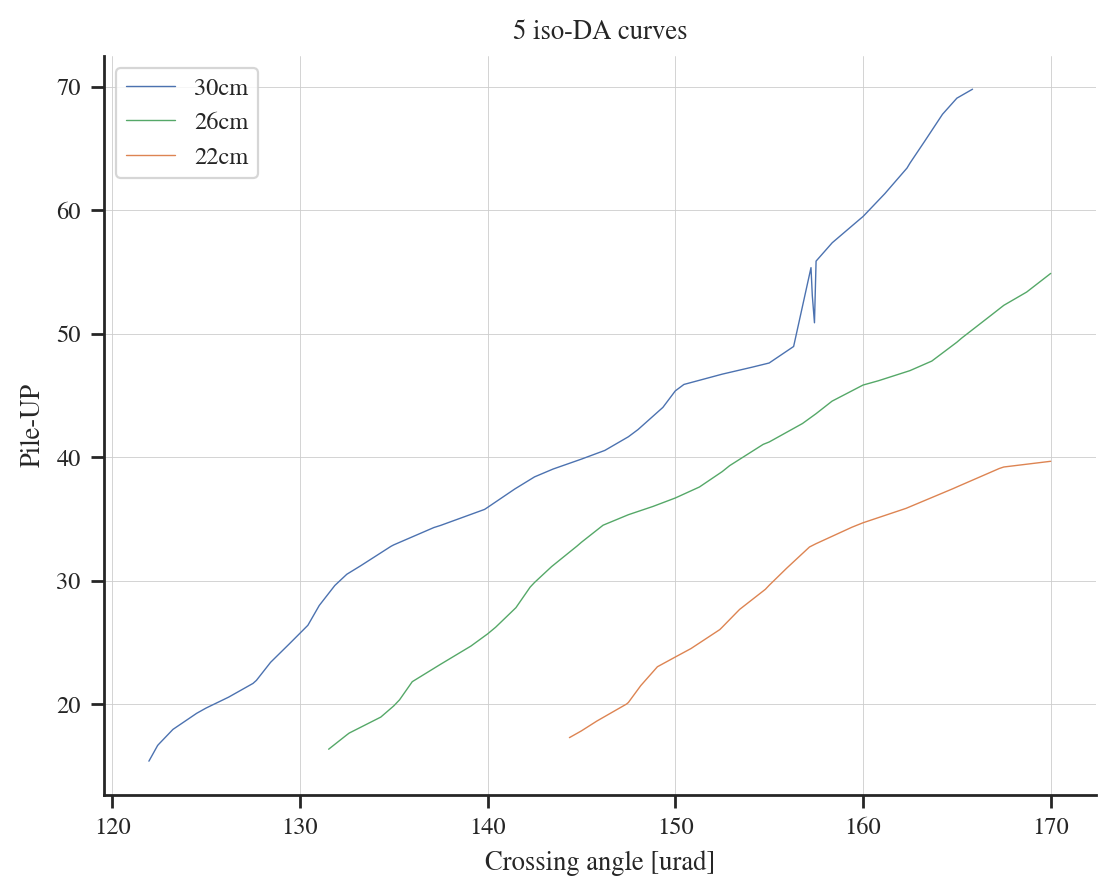

In [ ]:
plt.plot(x_real_30cm,ll_PU[0], color = 'C0', label = '30cm')
plt.plot(x_real_26cm,ll_PU[1], color = 'C2', label = '26cm')
plt.plot(x_real_22cm,ll_PU[2], color = 'C1', label = '22cm')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Pile-UP")
plt.title("5.5 iso-DA curves for negative octupoles")
#plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
plt.savefig('plots/iso_DA_5dot5_PU_neg_oct.pdf')
plt.show()


plt.plot(x_real_30cm_5sig,ll_PU_5sig[0], color = 'C0', label = '30cm')
plt.plot(x_real_26cm_5sig,ll_PU_5sig[1], color = 'C2', label = '26cm')
plt.plot(x_real_22cm_5sig,ll_PU_5sig[2], color = 'C1', label = '22cm')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Pile-UP")
plt.title("5 iso-DA curves for negative octupoles")
#plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
plt.savefig('plots/iso_DA_5_PU_neg_oct.pdf')
plt.show()